# Appendix A Code. Experiment Data and Preprocessing

## Raw Fluorescence Intensity

In [33]:
import pandas as pd
type = 0


aerobic_data = {
    'EcN': [12.6419, 3.50436, 4.11498, 2.57417, 3.21554, 4.9798],
    'Empty': [3.58482, 2.39217, 3.27669, 3.32769, 2.73791, 6.39749],
    'fadr': [3.79965, 3.37068, 3.77813, 3.81306, 3.41338, 7.5688],
    'fadr(10%)': [8.04713, 8.00897, 9.52859, 9.30542, 5.72605, 11.253],
    'fadr(15%)': [15.9822, 10.9588, 8.37846, 8.54403, 9.46967, 8.25162]
}

anaerobic_data = {
    'fadr(15%)': [10.9322, 15.3313, 10.7308, 7.12909, 15.0872, 9.5774],
    'fadr(10%)': [15.6959, 7.39178, 12.5614, 5.69674, 7.3235, 7.12041],
    'fadr': [4.19457, 4.06125, 5.55815, 5.61971, 4.48174, 4.88524],
    'Empty': [3.94338, 4.22907, 5.20108, 5.67122, 3.716, 4.05016],
    'EcN': [5.46354, 6.56772, 5.66575, 6.59683, 5.54892, 6.50974]
}

# Convert to DataFrame
df_aerobic = pd.DataFrame(aerobic_data)
df_anaerobic = pd.DataFrame(anaerobic_data)

df_aerobic, df_anaerobic


(        EcN    Empty     fadr  fadr(10%)  fadr(15%)
 0  12.64190  3.58482  3.79965    8.04713   15.98220
 1   3.50436  2.39217  3.37068    8.00897   10.95880
 2   4.11498  3.27669  3.77813    9.52859    8.37846
 3   2.57417  3.32769  3.81306    9.30542    8.54403
 4   3.21554  2.73791  3.41338    5.72605    9.46967
 5   4.97980  6.39749  7.56880   11.25300    8.25162,
    fadr(15%)  fadr(10%)     fadr    Empty      EcN
 0   10.93220   15.69590  4.19457  3.94338  5.46354
 1   15.33130    7.39178  4.06125  4.22907  6.56772
 2   10.73080   12.56140  5.55815  5.20108  5.66575
 3    7.12909    5.69674  5.61971  5.67122  6.59683
 4   15.08720    7.32350  4.48174  3.71600  5.54892
 5    9.57740    7.12041  4.88524  4.05016  6.50974)

In [34]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for aerobic and anaerobic data
z_aerobic = np.abs(zscore(df_aerobic))
z_anaerobic = np.abs(zscore(df_anaerobic))

# Identify outliers
outliers_aerobic = np.where(z_aerobic > 3)
outliers_anaerobic = np.where(z_anaerobic > 3)

outliers_aerobic, outliers_anaerobic


((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

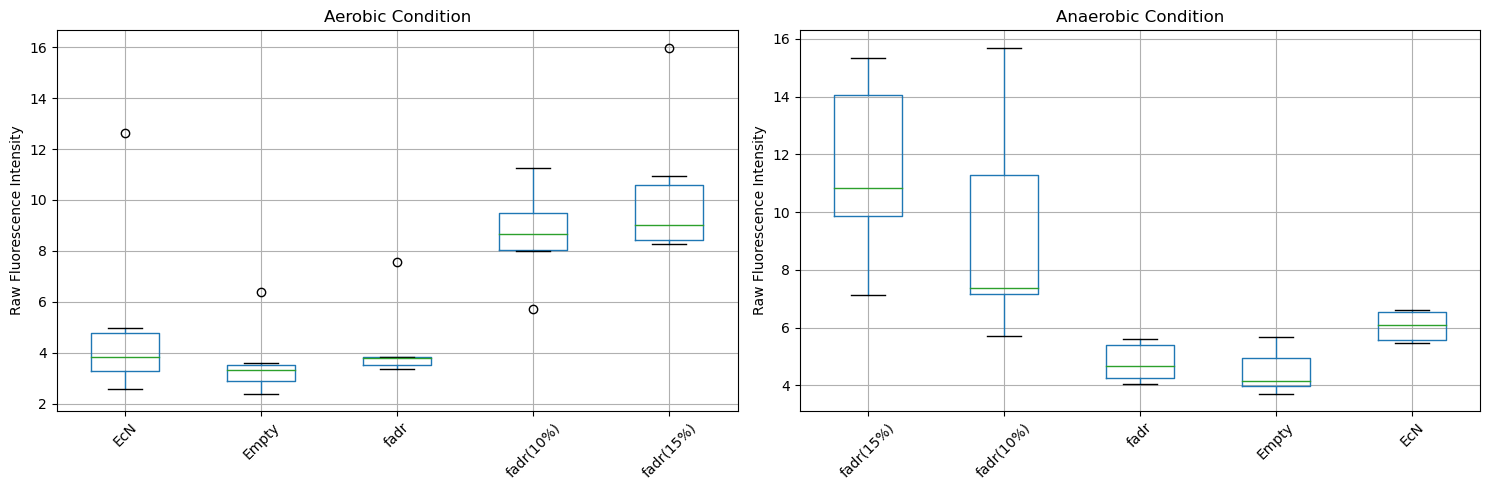

In [35]:
import matplotlib.pyplot as plt

# Plotting box plots for aerobic and anaerobic data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Aerobic data box plot
df_aerobic.boxplot(ax=ax[0])
ax[0].set_title('Aerobic Condition')
ax[0].set_ylabel('Raw Fluorescence Intensity')
ax[0].set_xticklabels(df_aerobic.columns, rotation=45)

# Anaerobic data box plot
df_anaerobic.boxplot(ax=ax[1])
ax[1].set_title('Anaerobic Condition')
ax[1].set_ylabel('Raw Fluorescence Intensity')
ax[1].set_xticklabels(df_anaerobic.columns, rotation=45)

plt.tight_layout()
plt.show()


In [36]:
# List to store the locations of outliers
outlier_positions = []
print("df_aerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_aerobic.columns:
    median_value = df_aerobic[column].median()
    Q1 = df_aerobic[column].quantile(0.25)
    Q3 = df_aerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_aerobic[column]):
        # if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
        if (value < (Q1 - 0.5 * IQR)) or (value > (Q3 + 0.5 * IQR)):
            outlier_positions.append((i, column))
            df_aerobic.at[i, column] = median_value
# outlier_positions, df_aerobic

df_aerobic processing


In [37]:
# Display the positions of detected outliers and the imputed aerobic data

# List to store the locations of outliers
outlier_positions = []
print("df_anaerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_anaerobic.columns:
    median_value = df_anaerobic[column].median()
    Q1 = df_anaerobic[column].quantile(0.25)
    Q3 = df_anaerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_anaerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
            outlier_positions.append((i, column))
            df_anaerobic.at[i, column] = median_value

# Display the positions of detected outliers and the imputed aerobic data
# outlier_positions, df_anaerobic


df_anaerobic processing


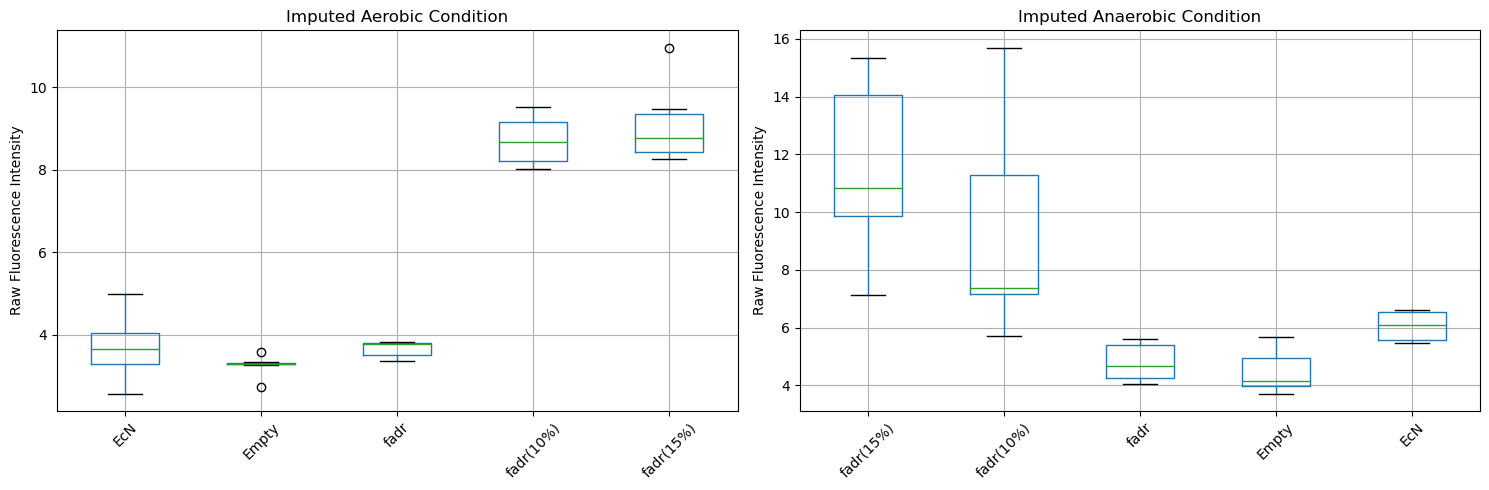

In [38]:
# Plotting box plots for the imputed aerobic data and the anaerobic data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Imputed Aerobic data box plot
df_aerobic.boxplot(ax=ax[0])
ax[0].set_title('Imputed Aerobic Condition')
ax[0].set_ylabel('Raw Fluorescence Intensity')
ax[0].set_xticklabels(df_aerobic.columns, rotation=45)

# Anaerobic data box plot
df_anaerobic.boxplot(ax=ax[1])
ax[1].set_title('Imputed Anaerobic Condition')
ax[1].set_ylabel('Raw Fluorescence Intensity')
ax[1].set_xticklabels(df_anaerobic.columns, rotation=45)

plt.tight_layout()
plt.show()


In [39]:
Fluorescence_aerobic, Fluorescence_anaerobic = df_aerobic, df_anaerobic
Fluorescence_aerobic, Fluorescence_anaerobic

(       EcN    Empty     fadr  fadr(10%)  fadr(15%)
 0  3.80967  3.58482  3.79965   8.047130    9.00685
 1  3.50436  3.30219  3.37068   8.008970   10.95880
 2  4.11498  3.27669  3.77813   9.528590    8.37846
 3  2.57417  3.32769  3.81306   9.305420    8.54403
 4  3.21554  2.73791  3.41338   8.676275    9.46967
 5  4.97980  3.30219  3.78889   8.676275    8.25162,
    fadr(15%)  fadr(10%)     fadr    Empty      EcN
 0   10.93220   15.69590  4.19457  3.94338  5.46354
 1   15.33130    7.39178  4.06125  4.22907  6.56772
 2   10.73080   12.56140  5.55815  5.20108  5.66575
 3    7.12909    5.69674  5.61971  5.67122  6.59683
 4   15.08720    7.32350  4.48174  3.71600  5.54892
 5    9.57740    7.12041  4.88524  4.05016  6.50974)

## OD600

In [40]:
## OD600
# Aerobic data
aerobic_OD600 = {
    'EcN': [0.0559483, 0.904543, 0.664329, 0.78447, 0.585704, 0.112456],
    'Empty': [0.533143, 1.00096, 1.02634, 0.954574, 1.08133, 0.485532],
    'fadr': [0.751334, 1.12907, 1.09321, 1.12165, 1.14516, 0.449456],
    'fadr(10%)': [0.257423, 0.355064, 0.702797, 0.578667, 0.645905, 0.381362],
    'fadr(15%)': [0.329995, 0.304138, 0.381901, 0.537283, 0.66881, 0.465604]
}


# Anaerobic data
anaerobic_OD600 = {
    'fadr(15%)': [0.523459, 0.470605, 0.515366, 0.526875, 0.535011, 0.5816],
    'fadr(10%)': [0.733337, 0.58706, 0.540721, 0.545073, 0.556237, 0.577704],
    'fadr': [0.770098, 0.872549, 0.911328, 0.856706, 0.991217, 1.00488],
    'Empty': [1.04615, 1.15592, 1.11314, 1.0036, 1.07264, 1.07447],
    'EcN': [1.02369, 0.99399, 0.936342, 0.977103, 1.12848, 0.980699]
}


# Convert to DataFrame
df_aerobic = pd.DataFrame(aerobic_OD600)
df_anaerobic = pd.DataFrame(anaerobic_OD600)

# df_aerobic, df_anaerobic


In [41]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for aerobic and anaerobic data
z_aerobic = np.abs(zscore(df_aerobic))
z_anaerobic = np.abs(zscore(df_anaerobic))

# Identify outliers
outliers_aerobic = np.where(z_aerobic > 3)
outliers_anaerobic = np.where(z_anaerobic > 3)
outliers_aerobic, outliers_anaerobic


((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [42]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for aerobic and anaerobic data
z_aerobic = np.abs(zscore(df_aerobic))
z_anaerobic = np.abs(zscore(df_anaerobic))

# Identify outliers
outliers_aerobic = np.where(z_aerobic > 3)
outliers_anaerobic = np.where(z_anaerobic > 3)

outliers_aerobic, outliers_anaerobic

((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [43]:
# List to store the locations of outliers
outlier_positions = []
print("df_aerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_aerobic.columns:
    median_value = df_aerobic[column].median()
    Q1 = df_aerobic[column].quantile(0.25)
    Q3 = df_aerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_aerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
        # if (value < (Q1 - 0.5 * IQR)) or (value > (Q3 + 0.5 * IQR)):
            outlier_positions.append((i, column))
            df_aerobic.at[i, column] = median_value
            
# outlier_positions, df_aerobic

df_aerobic processing


In [44]:
# Display the positions of detected outliers and the imputed aerobic data

# List to store the locations of outliers
outlier_positions = []
print("df_anaerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_anaerobic.columns:
    median_value = df_anaerobic[column].median()
    Q1 = df_anaerobic[column].quantile(0.25)
    Q3 = df_anaerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_anaerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
        # if (value < (Q1 - 0.5 * IQR)) or (value > (Q3 + 0.5 * IQR)):
            outlier_positions.append((i, column))
            df_anaerobic.at[i, column] = median_value

# Display the positions of detected outliers and the imputed aerobic data
outlier_positions


df_anaerobic processing


[(1, 'fadr(15%)'), (5, 'fadr(15%)'), (0, 'fadr(10%)'), (4, 'EcN')]

In [45]:
Fluorescence_aerobic, Fluorescence_anaerobic

(       EcN    Empty     fadr  fadr(10%)  fadr(15%)
 0  3.80967  3.58482  3.79965   8.047130    9.00685
 1  3.50436  3.30219  3.37068   8.008970   10.95880
 2  4.11498  3.27669  3.77813   9.528590    8.37846
 3  2.57417  3.32769  3.81306   9.305420    8.54403
 4  3.21554  2.73791  3.41338   8.676275    9.46967
 5  4.97980  3.30219  3.78889   8.676275    8.25162,
    fadr(15%)  fadr(10%)     fadr    Empty      EcN
 0   10.93220   15.69590  4.19457  3.94338  5.46354
 1   15.33130    7.39178  4.06125  4.22907  6.56772
 2   10.73080   12.56140  5.55815  5.20108  5.66575
 3    7.12909    5.69674  5.61971  5.67122  6.59683
 4   15.08720    7.32350  4.48174  3.71600  5.54892
 5    9.57740    7.12041  4.88524  4.05016  6.50974)

In [46]:
OD600_aerobic, OD600_anaerobic = df_aerobic, df_anaerobic
OD600_aerobic, OD600_anaerobic

(        EcN     Empty      fadr  fadr(10%)  fadr(15%)
 0  0.055948  0.533143  0.751334   0.257423   0.329995
 1  0.904543  1.000960  1.129070   0.355064   0.304138
 2  0.664329  1.026340  1.093210   0.702797   0.381901
 3  0.784470  0.954574  1.121650   0.578667   0.537283
 4  0.585704  1.081330  1.145160   0.645905   0.668810
 5  0.112456  0.485532  0.449456   0.381362   0.465604,
    fadr(15%)  fadr(10%)      fadr    Empty       EcN
 0   0.523459   0.566971  0.770098  1.04615  1.023690
 1   0.525167   0.587060  0.872549  1.15592  0.993990
 2   0.515366   0.540721  0.911328  1.11314  0.936342
 3   0.526875   0.545073  0.856706  1.00360  0.977103
 4   0.535011   0.556237  0.991217  1.07264  0.987345
 5   0.525167   0.577704  1.004880  1.07447  0.980699)

## Data calculation

对于这里的数据，我们需要计算绝对荧光强度，需要首先将各自的Raw Fluorescence Intensity数据除以OD600数据得到绝对荧光强度值，然后再用fadr(5%)  的数据减去 fadr的背景值，即得到最终fadr(5%)的荧光强度值

In [47]:
Fluorescence_aerobic = Fluorescence_aerobic.mean()
Fluorescence_anaerobic = Fluorescence_anaerobic.mean()
OD600_aerobic = OD600_aerobic.mean()
OD600_anaerobic = OD600_anaerobic.mean()

# Calculating the absolute fluorescence intensity for aerobic and anaerobic
absolute_fluorescence_aerobic = Fluorescence_aerobic.divide(OD600_aerobic)
absolute_fluorescence_anaerobic = Fluorescence_anaerobic.divide(OD600_anaerobic)

# Correcting the fadr(10%) and fadr(15%) fluorescence intensity by subtracting fadr's background value
corrected_fadr10_aerobic = absolute_fluorescence_aerobic['fadr(10%)'] - absolute_fluorescence_aerobic['Empty']
corrected_fadr15_aerobic = absolute_fluorescence_aerobic['fadr(15%)'] - absolute_fluorescence_aerobic['Empty']
corrected_fadr10_anaerobic = absolute_fluorescence_anaerobic['fadr(10%)'] - absolute_fluorescence_anaerobic['Empty']
corrected_fadr15_anaerobic = absolute_fluorescence_anaerobic['fadr(15%)'] - absolute_fluorescence_anaerobic['Empty']

corrected_fadr0_aerobic = absolute_fluorescence_aerobic['fadr'] - absolute_fluorescence_aerobic['Empty']
corrected_fadr0_anaerobic = absolute_fluorescence_anaerobic['fadr'] - absolute_fluorescence_anaerobic['Empty']

# corrected_fadr10_aerobic = absolute_fluorescence_aerobic['fadr(10%)'] - Fluorescence_aerobic['Empty']
# corrected_fadr15_aerobic = absolute_fluorescence_aerobic['fadr(15%)'] - Fluorescence_aerobic['Empty']
# corrected_fadr10_anaerobic = absolute_fluorescence_anaerobic['fadr(10%)'] - Fluorescence_anaerobic['Empty']
# corrected_fadr15_anaerobic = absolute_fluorescence_anaerobic['fadr(15%)'] - Fluorescence_anaerobic['Empty']

# corrected_fadr0_aerobic, corrected_fadr0_anaerobic
corrected_fadr10_aerobic, corrected_fadr15_aerobic, corrected_fadr10_anaerobic, corrected_fadr15_anaerobic
# corrected_fadr10_aerobic.mean(), corrected_fadr15_aerobic.mean(), corrected_fadr10_anaerobic.mean(), corrected_fadr15_anaerobic.mean()

(14.040502235597497, 16.474681593595285, 12.389843214744648, 17.68371927468412)